# Sesi 6

EDA with Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [3]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
# Checking the missing values
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [5]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [6]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [7]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [8]:
missing_values = ['n/a', 'na', '--', 'kosong', 'tidak diinput']

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv',
                na_values = missing_values)

In [10]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [11]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [12]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [13]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [14]:
cnt = 0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    cnt+=1

In [15]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [16]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [17]:
df.isnull().values.any()

True

In [18]:
df.isnull().sum().sum()

12

In [19]:
df['ST_NUM'].fillna(21, inplace=True)

In [20]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,21.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0


In [21]:
df.loc[2, 'ST_NUM'] = 310

In [22]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,310.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0


In [23]:
# fill the missing values with median
median =df['NUM_BEDROOMS'].median()

df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [24]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,310.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0


## Time Series

In [25]:
from datetime import datetime

In [26]:
date_rng = pd.date_range(start = '1/01/2021',
             end = '1/08/2021',
             freq = 'H')

In [27]:
date_rng

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-01-07 15:00:00', '2021-01-07 16:00:00',
               '2021-01-07 17:00:00', '2021-01-07 18:00:00',
               '2021-01-07 19:00:00', '2021-01-07 20:00:00',
               '2021-01-07 21:00:00', '2021-01-07 22:00:00',
               '2021-01-07 23:00:00', '2021-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [28]:
df = pd.DataFrame(date_rng, columns=['date'])

In [29]:
df['data'] = np.random.randint(0,
                              100,
                              size = (len(date_rng)))

In [30]:
df.head()

,date,data
0,2021-01-01 00:00:00,72
1,2021-01-01 01:00:00,50
2,2021-01-01 02:00:00,19
3,2021-01-01 03:00:00,31
4,2021-01-01 04:00:00,11


In [31]:
df.set_index('date', inplace=True)

In [32]:
df.head()

,data
date,
2021-01-01 00:00:00,72
2021-01-01 01:00:00,50
2021-01-01 02:00:00,19
2021-01-01 03:00:00,31
2021-01-01 04:00:00,11


In [33]:
string_date = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [34]:
string_date

['June-01-2020', 'June-02-2020', 'June-03-2020']

In [35]:
[datetime.strptime(x, '%B-%d-%Y') for x in string_date]

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [36]:
df.head()

,data
date,
2021-01-01 00:00:00,72
2021-01-01 01:00:00,50
2021-01-01 02:00:00,19
2021-01-01 03:00:00,31
2021-01-01 04:00:00,11


In [37]:
df[df.index.day == 2]

,data
date,
2021-01-02 00:00:00,7
2021-01-02 01:00:00,74
2021-01-02 02:00:00,99
2021-01-02 03:00:00,29
2021-01-02 04:00:00,62
2021-01-02 05:00:00,35
2021-01-02 06:00:00,67
2021-01-02 07:00:00,66
2021-01-02 08:00:00,23


In [38]:
df['2021-01-03']

,data
date,
2021-01-03 00:00:00,60
2021-01-03 01:00:00,74
2021-01-03 02:00:00,25
2021-01-03 03:00:00,96
2021-01-03 04:00:00,84
2021-01-03 05:00:00,59
2021-01-03 06:00:00,73
2021-01-03 07:00:00,70
2021-01-03 08:00:00,3


In [39]:
df['2021-01-04' : '2021-01-06']

,data
date,
2021-01-04 00:00:00,36
2021-01-04 01:00:00,37
2021-01-04 02:00:00,93
2021-01-04 03:00:00,60
2021-01-04 04:00:00,73
...,...
2021-01-06 19:00:00,86
2021-01-06 20:00:00,86
2021-01-06 21:00:00,26


In [40]:
df.resample('D').mean()

,data
date,
2021-01-01,45.375000
2021-01-02,49.791667
2021-01-03,54.541667
2021-01-04,49.250000
2021-01-05,61.000000
2021-01-06,48.458333
2021-01-07,36.666667
2021-01-08,94.000000


In [41]:
df.rolling(3).sum()

,data
date,
2021-01-01 00:00:00,NaN
2021-01-01 01:00:00,NaN
2021-01-01 02:00:00,141.0
2021-01-01 03:00:00,100.0
2021-01-01 04:00:00,61.0
...,...
2021-01-07 20:00:00,76.0
2021-01-07 21:00:00,71.0
2021-01-07 22:00:00,80.0


In [42]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')

In [43]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [44]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [45]:
opsd_daily.set_index('Date', inplace=True)
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [46]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',
                        index_col = 0,
                        parse_dates=True)
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [47]:
opsd_daily['Year'] =opsd_daily.index.year
opsd_daily['Month'] =opsd_daily.index.month
opsd_daily['Weekday'] =opsd_daily.index.weekday

opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [48]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [49]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


In [50]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


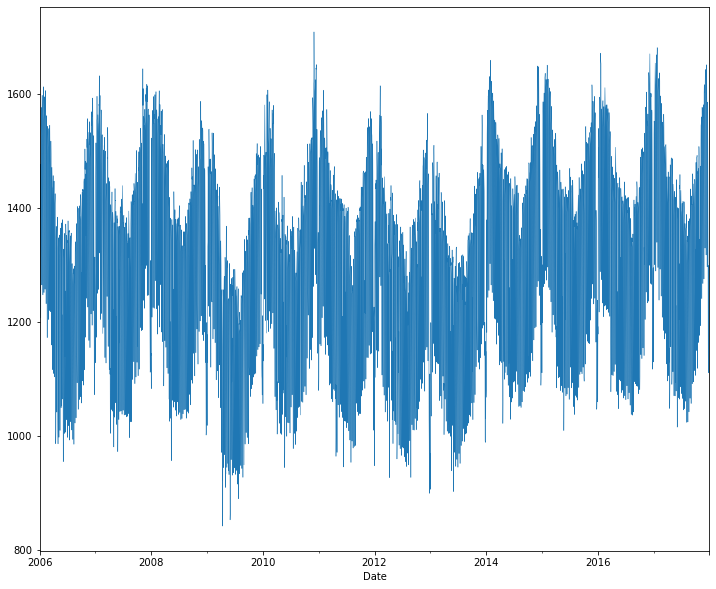

In [51]:
opsd_daily['Consumption'].plot(linewidth=0.5, figsize=(12, 10));

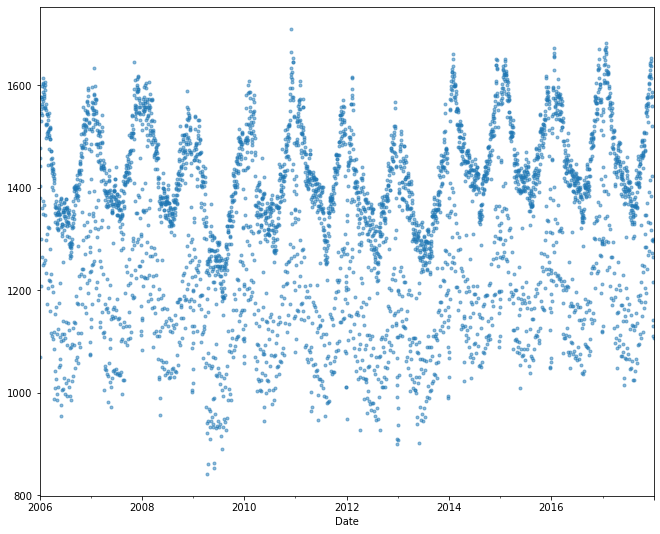

In [52]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

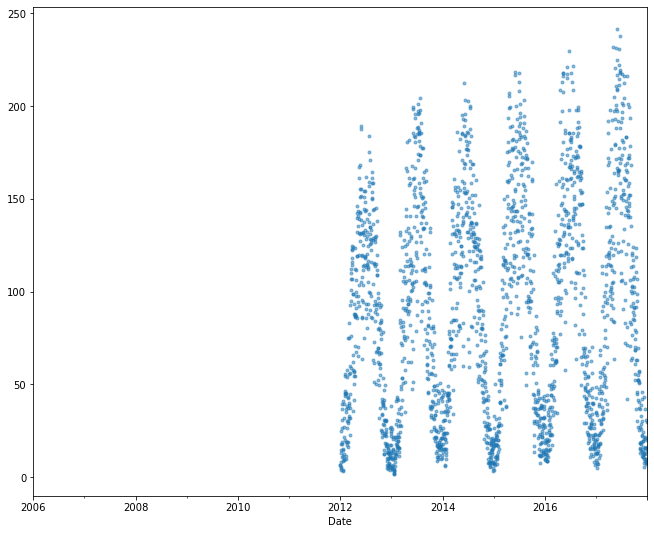

In [53]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

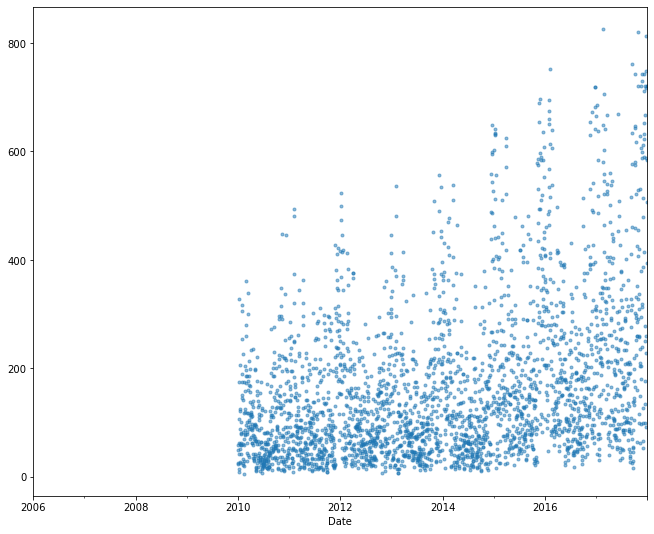

In [54]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

<AxesSubplot:xlabel='Date'>

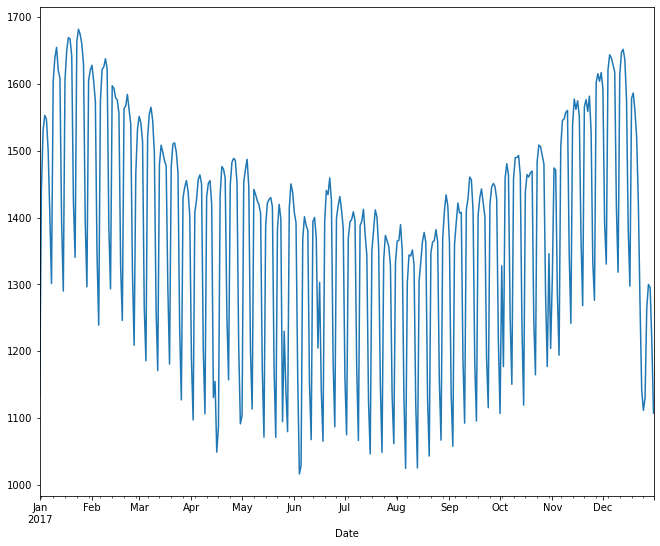

In [55]:
opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))

<AxesSubplot:xlabel='Date'>

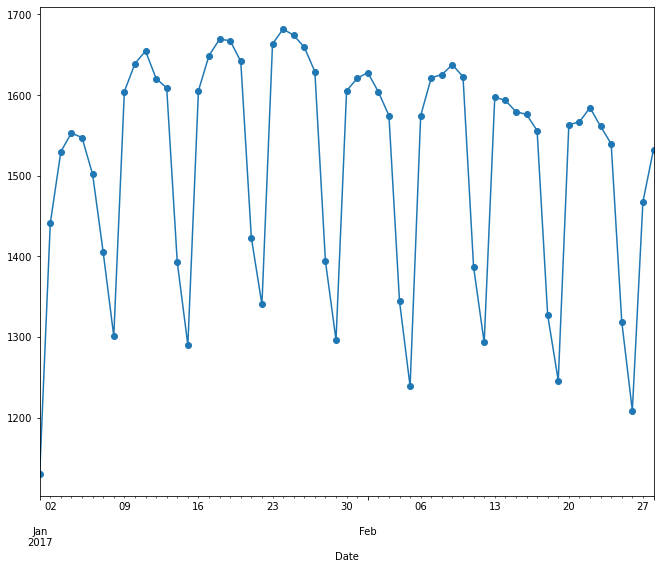

In [56]:
opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11, 9))

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

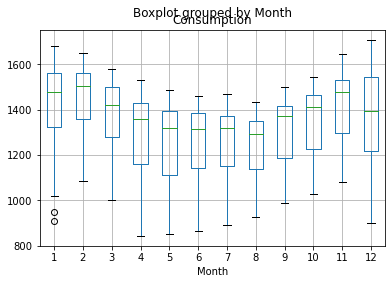

In [57]:
opsd_daily.boxplot(column=['Consumption'], by='Month')

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

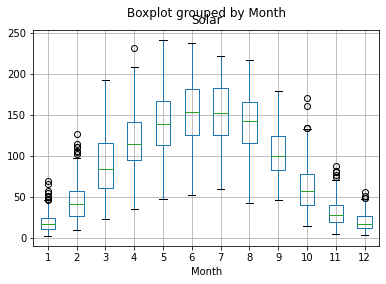

In [58]:
opsd_daily.boxplot(column=['Solar'], by='Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

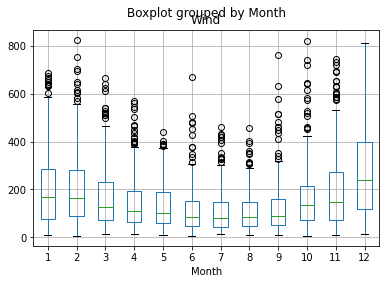

In [59]:
opsd_daily.boxplot(column=['Wind'], by='Month')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

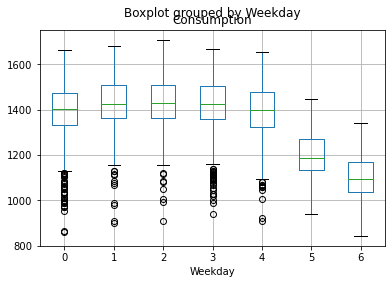

In [60]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

In [61]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [62]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


<AxesSubplot:xlabel='Date'>

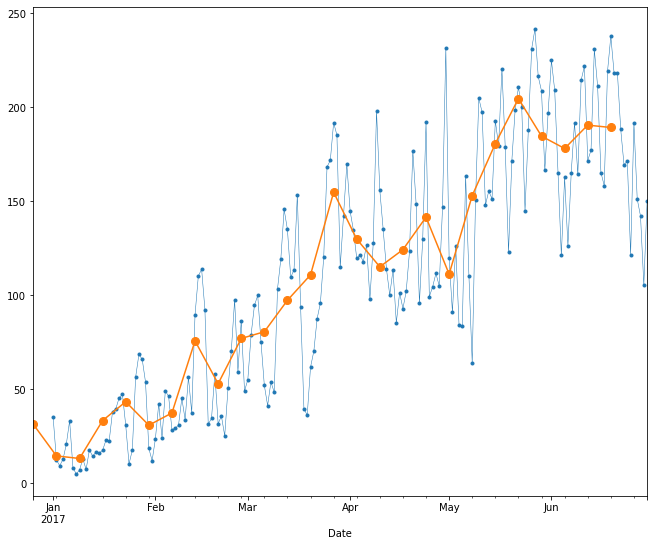

In [63]:
start, end = '2017-01', '2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))

## Analyzing Obesity in England

In [64]:
data = pd.ExcelFile('dataset/obes.xls')

In [65]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [66]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [67]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [68]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

In [69]:
data_age.dropna(inplace=True)

In [70]:
data_age.set_index('Year', inplace=True)

In [71]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<AxesSubplot:xlabel='Year'>

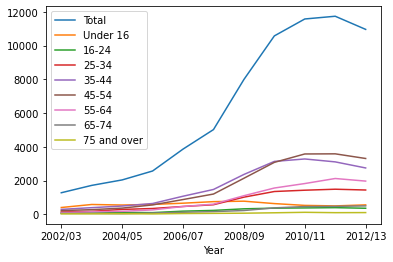

In [72]:
data_age.plot()

In [73]:
data_age_minus_total = data_age.drop('Total', axis=1)

<AxesSubplot:xlabel='Year'>

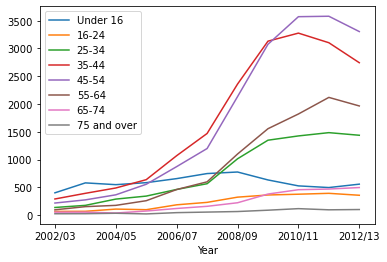

In [74]:
data_age_minus_total.plot()

<AxesSubplot:xlabel='Year'>

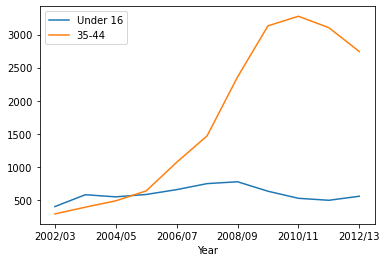

In [75]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label='35-44', legend=True)